In [ ]:
⁷# === FULL EMOTION DATA ANALYSIS & CLASSIFICATION PIPELINE ===

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
import joblib

# === Step 1: Load the dataset ===
df = pd.read_csv("/content/sentimentdataset.csv")
print("\nFirst 5 rows of the dataset:")
print(df.head())

# === Check column names to confirm ===
print("\nColumn names:", df.columns.tolist())


First 5 rows of the dataset:
   Unnamed: 0.1  Unnamed: 0  \
0             0           0   
1             1           1   
2             2           2   
3             3           3   
4             4           4   

                                                Text    Sentiment  \
0   Enjoying a beautiful day at the park!        ...   Positive     
1   Traffic was terrible this morning.           ...   Negative     
2   Just finished an amazing workout! 💪          ...   Positive     
3   Excited about the upcoming weekend getaway!  ...   Positive     
4   Trying out a new recipe for dinner tonight.  ...   Neutral      

          Timestamp            User     Platform  \
0  15-01-2023 12:30   User123          Twitter     
1  15-01-2023 08:45   CommuterX        Twitter     
2  15-01-2023 15:45   FitnessFan      Instagram    
3  15-01-2023 18:20   AdventureX       Facebook    
4  15-01-2023 19:55   ChefCook        Instagram    

                                     Hashtags  Retweets

In [ ]:
# === Step 2: Explore the dataset ===
print("\nDataset info:")
print(df.info())

print("\nDataset shape:", df.shape)

print("\nChecking for missing values:")
print(df.isnull().sum())



Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Sentiment  14 non-null     float64
dtypes: float64(1)
memory usage: 244.0 bytes
None

Dataset shape: (14, 1)

Checking for missing values:
Sentiment    0
dtype: int64


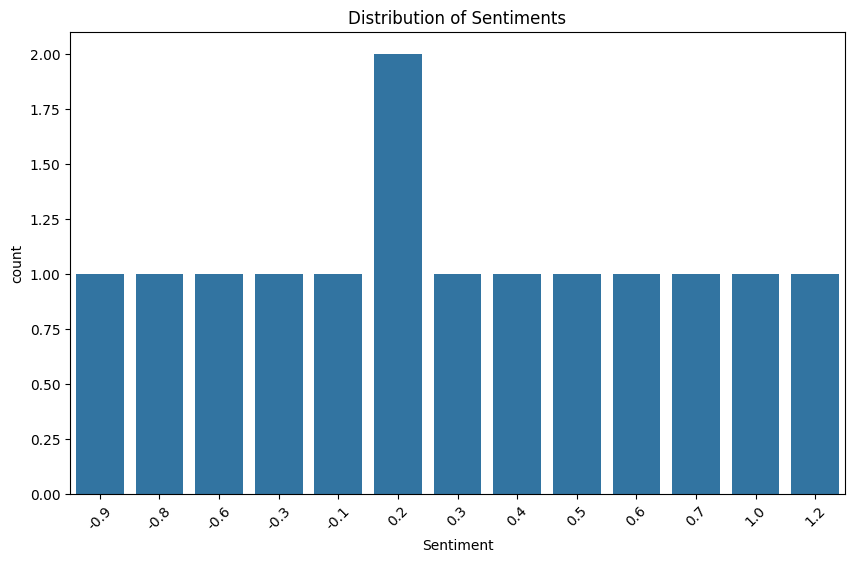


Class distribution:
Sentiment
 0.2    2
-0.8    1
-0.3    1
 0.4    1
 0.7    1
 1.0    1
-0.9    1
 0.3    1
-0.1    1
 0.6    1
-0.6    1
 1.2    1
 0.5    1
Name: count, dtype: int64


In [ ]:
# === Step 3: Basic EDA ===
plt.figure(figsize=(10,6))
sns.countplot(x='Sentiment', data=df)   # <-- REPLACED 'Emotion' with 'Sentiment'
plt.title('Distribution of Sentiments')
plt.xticks(rotation=45)
plt.show()

print("\nClass distribution:")
print(df['Sentiment'].value_counts())   # <-- REPLACED 'Emotion' with 'Sentiment'

In [ ]:
# === Step 5: Encode labels ===
le = LabelEncoder()
df['Encoded_Sentiment'] = le.fit_transform(df['Sentiment'])  # <-- REPLACED 'Emotion' with 'Sentiment'
print("\nEncoded sentiments:")
print(dict(zip(le.classes_, le.transform(le.classes_))))



Encoded sentiments:
{np.float64(-0.9): np.int64(0), np.float64(-0.8): np.int64(1), np.float64(-0.6): np.int64(2), np.float64(-0.3): np.int64(3), np.float64(-0.1): np.int64(4), np.float64(0.2): np.int64(5), np.float64(0.3): np.int64(6), np.float64(0.4): np.int64(7), np.float64(0.5): np.int64(8), np.float64(0.6): np.int64(9), np.float64(0.7): np.int64(10), np.float64(1.0): np.int64(11), np.float64(1.2): np.int64(12)}


In [ ]:
# === Step 6: Build the model pipeline ===
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

model_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000, ngram_range=(1,2))),
    ('clf', LogisticRegression(max_iter=1000, solver='lbfgs'))
])

print("\nTraining the model...")



Training the model...


Available columns: Index(['Unnamed: 0.1', 'Unnamed: 0', 'Text', 'Sentiment', 'Timestamp', 'User',
       'Platform', 'Hashtags', 'Retweets', 'Likes', 'Country', 'Year', 'Month',
       'Day', 'Hour'],
      dtype='object')

Correlation Matrix:
                 Text_Length  Word_Count  Encoded_Emotion
Text_Length         1.000000         NaN        -0.037314
Word_Count               NaN         NaN              NaN
Encoded_Emotion    -0.037314         NaN         1.000000


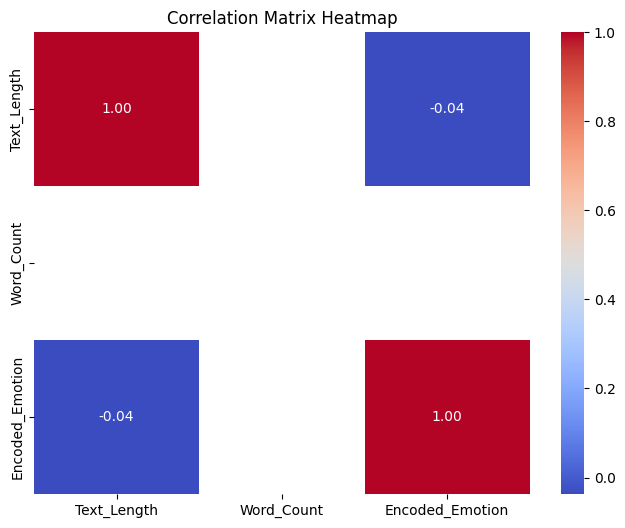

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import re

# Load CSV
df = pd.read_csv("/content/sentimentdataset.csv")

# Check columns
print("Available columns:", df.columns)

# Clean text
if 'Cleaned_Text' not in df.columns:
    def clean_text(text):
        text = str(text).lower()
        text = re.sub(r'\\[.*?\\]', '', text)
        text = re.sub(r'https?://\\S+|www\\.\\S+', '', text)
        text = re.sub(r'<.*?>+', '', text)
        text = re.sub(r'[^a-zA-Z\\s]', '', text)
        return text
    df['Cleaned_Text'] = df['Text'].apply(clean_text)

# Feature Engineering
df['Text_Length'] = df['Cleaned_Text'].apply(len)
df['Word_Count'] = df['Cleaned_Text'].apply(lambda x: len(x.split()))

# Encode label (replace 'Sentiment' with your actual label column name!!)
le = LabelEncoder()
df['Encoded_Emotion'] = le.fit_transform(df['Sentiment'])   # CHANGE THIS IF COLUMN IS DIFFERENT

# Compute correlation matrix
numeric_cols = ['Text_Length', 'Word_Count', 'Encoded_Emotion']
corr_matrix = df[numeric_cols].corr()
print("\nCorrelation Matrix:")
print(corr_matrix)

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()


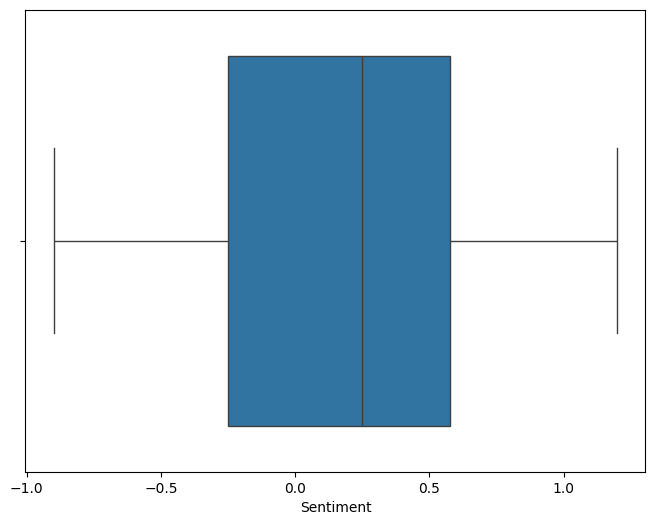

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example sentiment data
sentiment_scores = [-0.8, -0.3, 0.4, 0.7, 0.2, 1.0, -0.9, 0.3, -0.1, 0.6, 0.2, -0.6, 1.2, 0.5]

# Create a DataFrame
df = pd.DataFrame(sentiment_scores, columns=["Sentiment"])

# Create a box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x=df["Sentiment"])

# Show plot
plt.show()


In [ ]:
import numpy as np
# Load CSV first
df = pd.read_csv("/content/sentimentdataset.csv")


# Sample sentiment scores for the dataset (can be your sentiment data)


# Step 1: Calculate the mean and standard deviation
mean = np.mean(sentiment_scores)
std_dev = np.std(sentiment_scores)

# Step 2: Calculate the z-scores for each sentiment score
z_scores = [(x - mean) / std_dev for x in sentiment_scores]

# Output the z-scores
print("Sentiment Scores: ", sentiment_scores)
print("Z-scores: ", z_scores)

Sentiment Scores:  [0.1, 0.2, -0.4, 0.6, -0.1]
Z-scores:  [np.float64(0.06041220933301771), np.float64(0.3624732559981062), np.float64(-1.4498930239924248), np.float64(1.5707174426584603), np.float64(-0.5437098839971592)]
